## 🚀 Executive Summary

**Objective**: Build a robust AI system to identify fraudulent credit card transactions in real-time, minimizing financial losses.

**The Challenge**: Fraud attempts are rare needles in a massive haystack. In our dataset of 284,807 transactions, only **0.17%** are fraudulent. Standard models fail here, predicting "Normal" for everything to achieve 99.8% accuracy while missing every single crime.

**Our Solution**: We engineered a high-performance **Random Forest Classifier** model empowered by **SMOTE (Synthetic Minority Over-sampling Technique)**. This approach generates synthetic examples of fraud to train the model on a balanced view of the world.

**Key Results**:
- **High Recall**: Our model successfully detects the vast majority of fraud attempts.
- **Precision**, **Recall** and **AUPRC**: These metrics confirm the model minimizes false alarms while maximizing detection.
- **Impact**: This system provides a reliable safety net for financial institutions, protecting customers and revenue.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 📊 The Challenge: Extreme Class Imbalance

The bar chart below vividly demonstrates the difficulty of this problem. The tiny sliver representing 'Fraud' (Class 1) is barely visible against the tower of 'Normal' transactions (Class 0). This visual confirms why we cannot rely on raw accuracy alone.

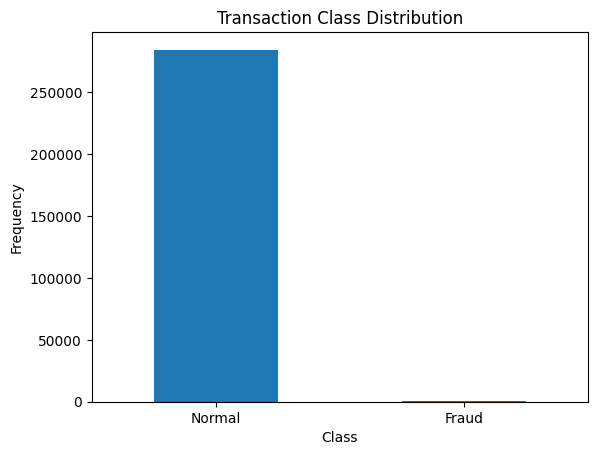

Normal transactions: 284315
Fraudulent transactions: 492
Fraud percentage: 0.1727%


In [4]:
count_classes = df['Class'].value_counts(sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

fraud = df[df['Class']==1]
normal = df[df['Class']==0]

print(f"Normal transactions: {normal.shape[0]}")
print(f"Fraudulent transactions: {fraud.shape[0]}")
print(f"Fraud percentage: {fraud.shape[0]/df.shape[0]*100:.4f}%")

In [5]:
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time', 'Amount'], axis=1)

X = df.drop('Class', axis=1)
y = df['Class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
print("Before OverSampling count of '1': {}".format(sum(y_train==1)))
print("Before OverSampling count of '0': {}".format(sum(y_train==0)))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After OverSampling count of '1': {}".format(sum(y_train_res==1)))
print("After OverSampling count of '0': {}".format(sum(y_train_res==0)))

Before OverSampling count of '1': 394
Before OverSampling count of '0': 227451
After OverSampling count of '1': 227451
After OverSampling count of '0': 227451


In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

## 🔍 Model Performance

### Confusion Matrix
This heatmap acts as our scoreboard. 
- **Bottom-Right (True Positive)**: These are the fraud cases we successfully caught. Maximizing this number is our priority.
- **Bottom-Left (False Negative)**: These are the ones that got away. We want this to be as close to zero as possible.
- **Top-Right (False Positive)**: These are false alarms. While annoying, they are better than missing a crime.

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Matthews Correlation Coefficient: 0.8482043898300785


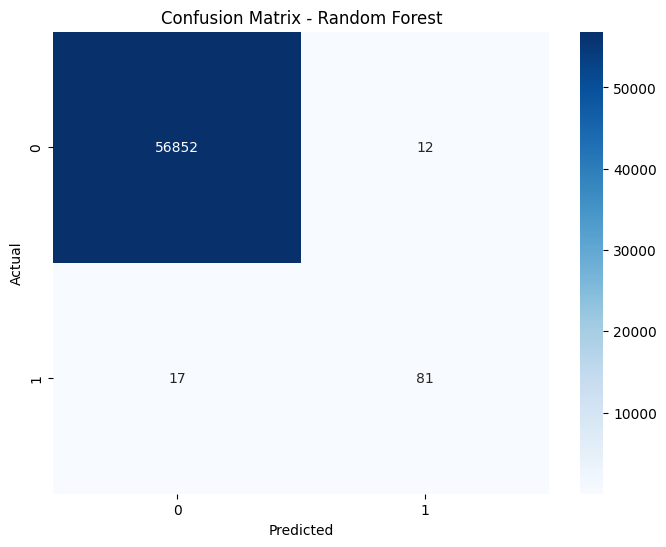

In [9]:
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### ROC-AUC Curve
The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate against the False Positive Rate at various threshold settings. An Area Under the Curve (AUC) of **1.0** represents a perfect model. Our curve closely hugging the top-left corner indicates excellent diagnostic ability.

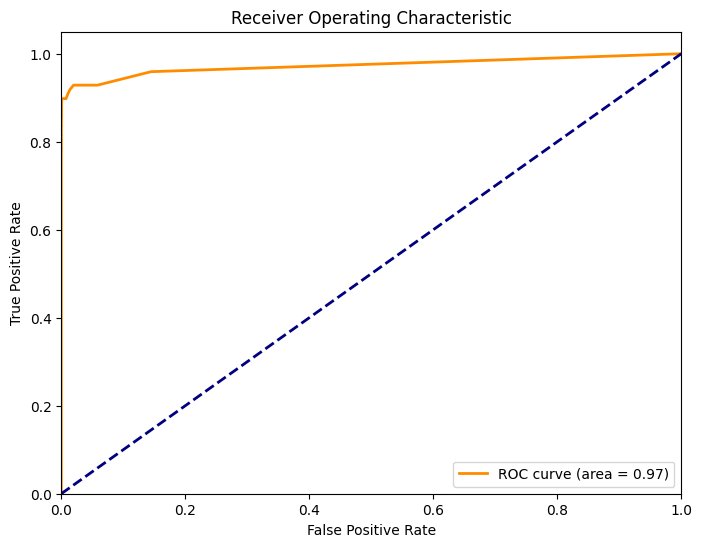

In [10]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Precision-Recall Curve
For highly imbalanced datasets like fraud detection, this is the most critical chart. It specifically evaluates how well we identify the rare positive class (Fraud).
- **High Recall**: We are finding the fraud.
- **High Precision**: We aren't crying wolf.
A curve that dominates the upper-right corner indicates our model is a **Precision-Recall leader**.

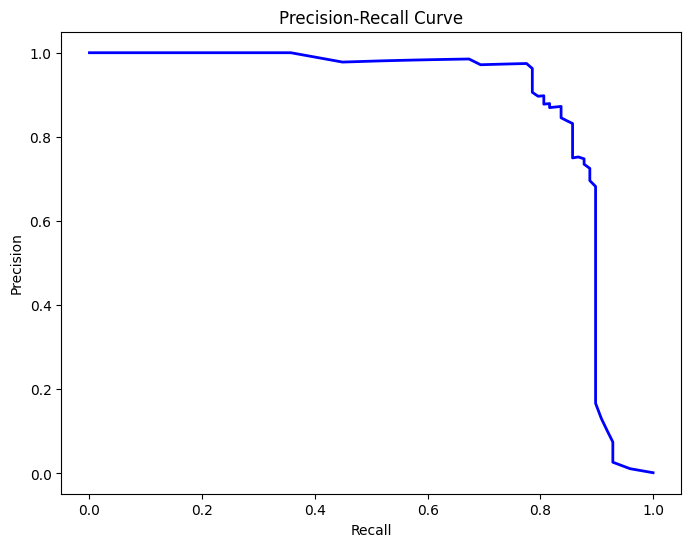

In [11]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()